Importing Libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import Data

# Importing and Cleaning Data

Copy of the main DataFrame

In [8]:
df = Data.DF.copy()
df.dropna(subset=['job_skills'], inplace=True)

Expand list of job_skills into separate rows (one skill per row)

In [9]:
df_exploded = df.explode('job_skills')

Pivot data by job title and skill to get median salary and skill counts

In [10]:
df_skills = (
pd.pivot_table(data = df_exploded,
               index = ['job_title_short', 'job_skills'],
               values = 'yearly_salary_avg',
               aggfunc = {'job_skills':'count', 'yearly_salary_avg':'median'})
               .rename(columns={'job_skills':'skill_count'})
)

df_skills = df_skills.reset_index()

# Visualizations

Visualize the top N most frequent skills for a given job and their associated median salaries

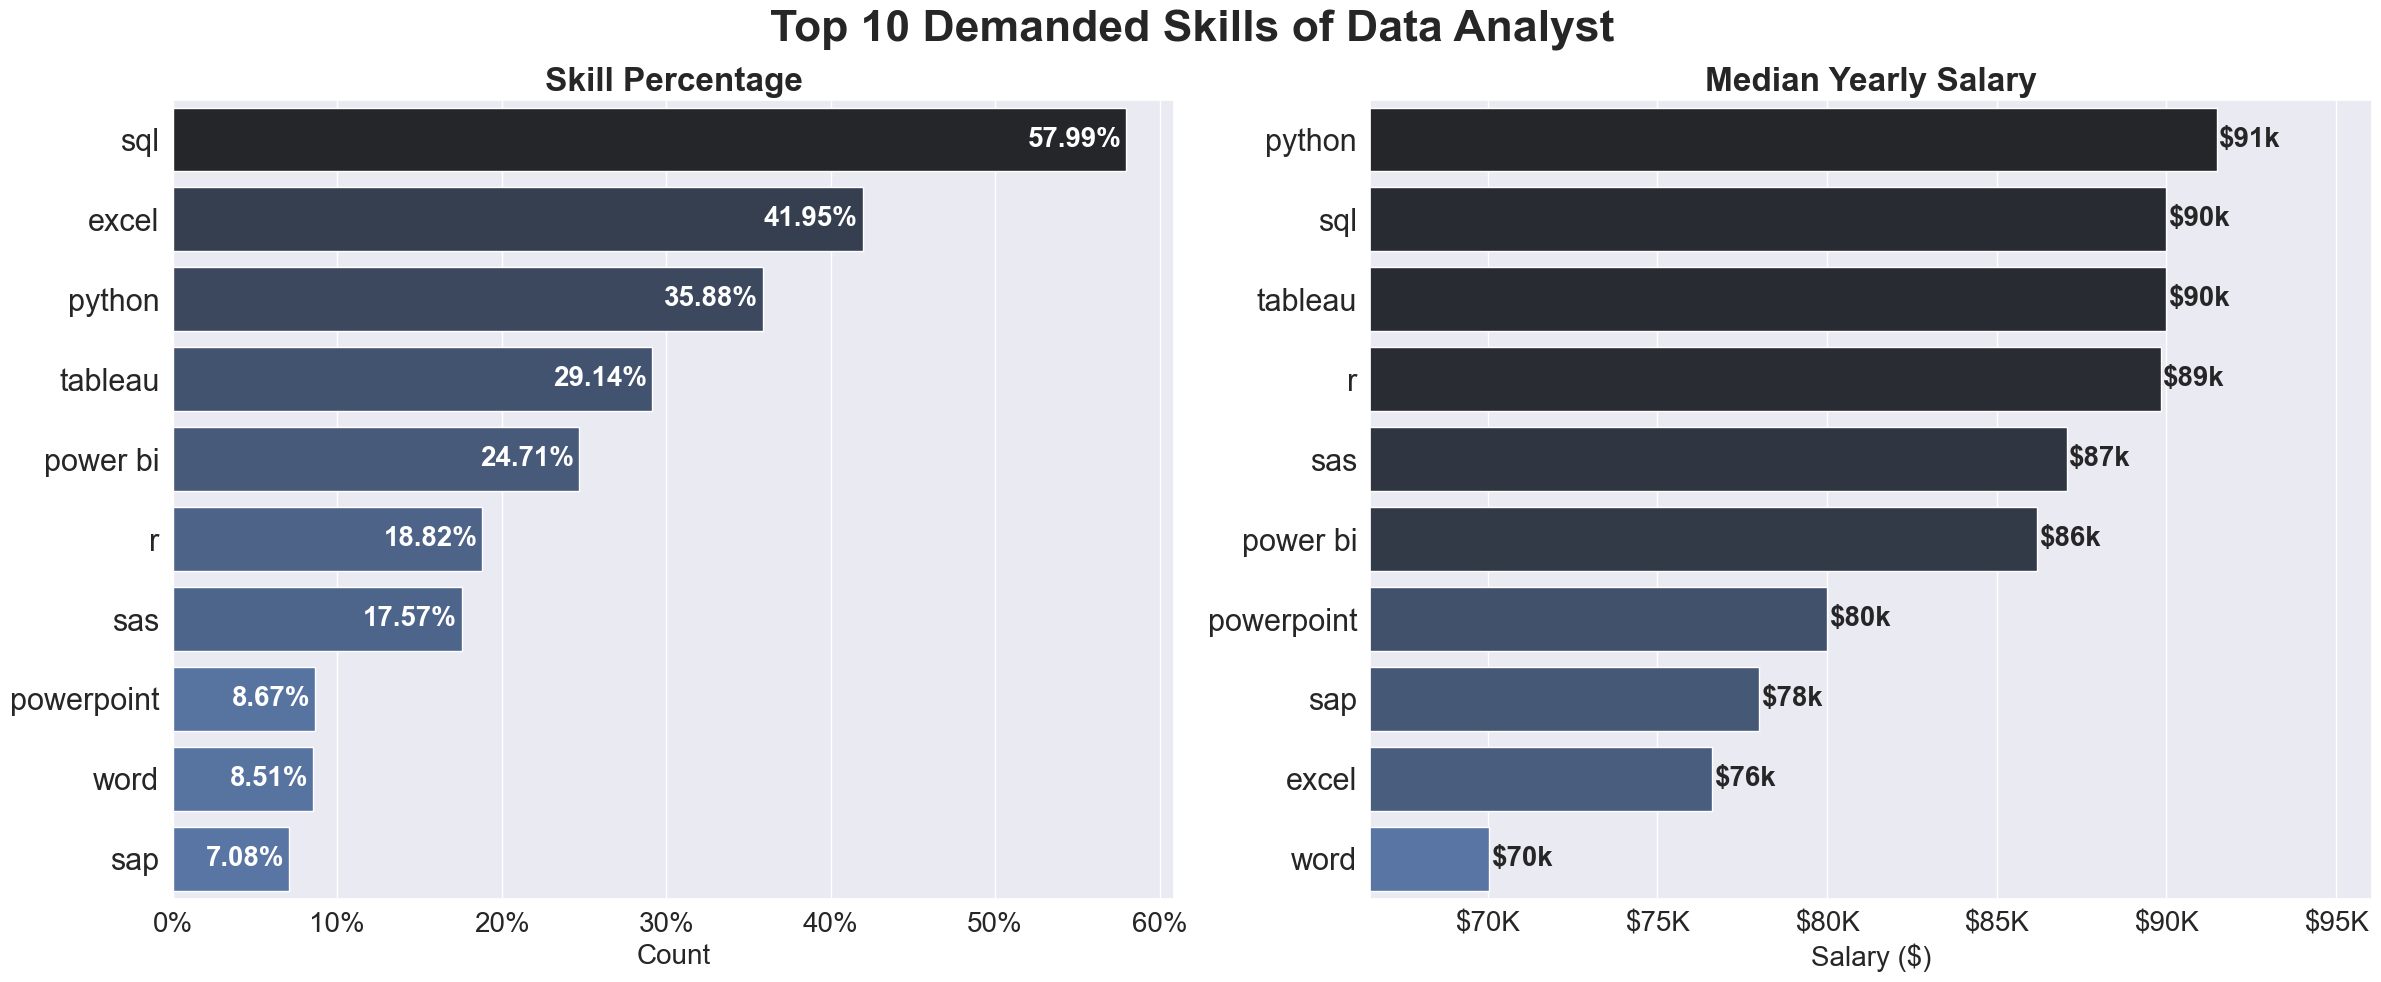

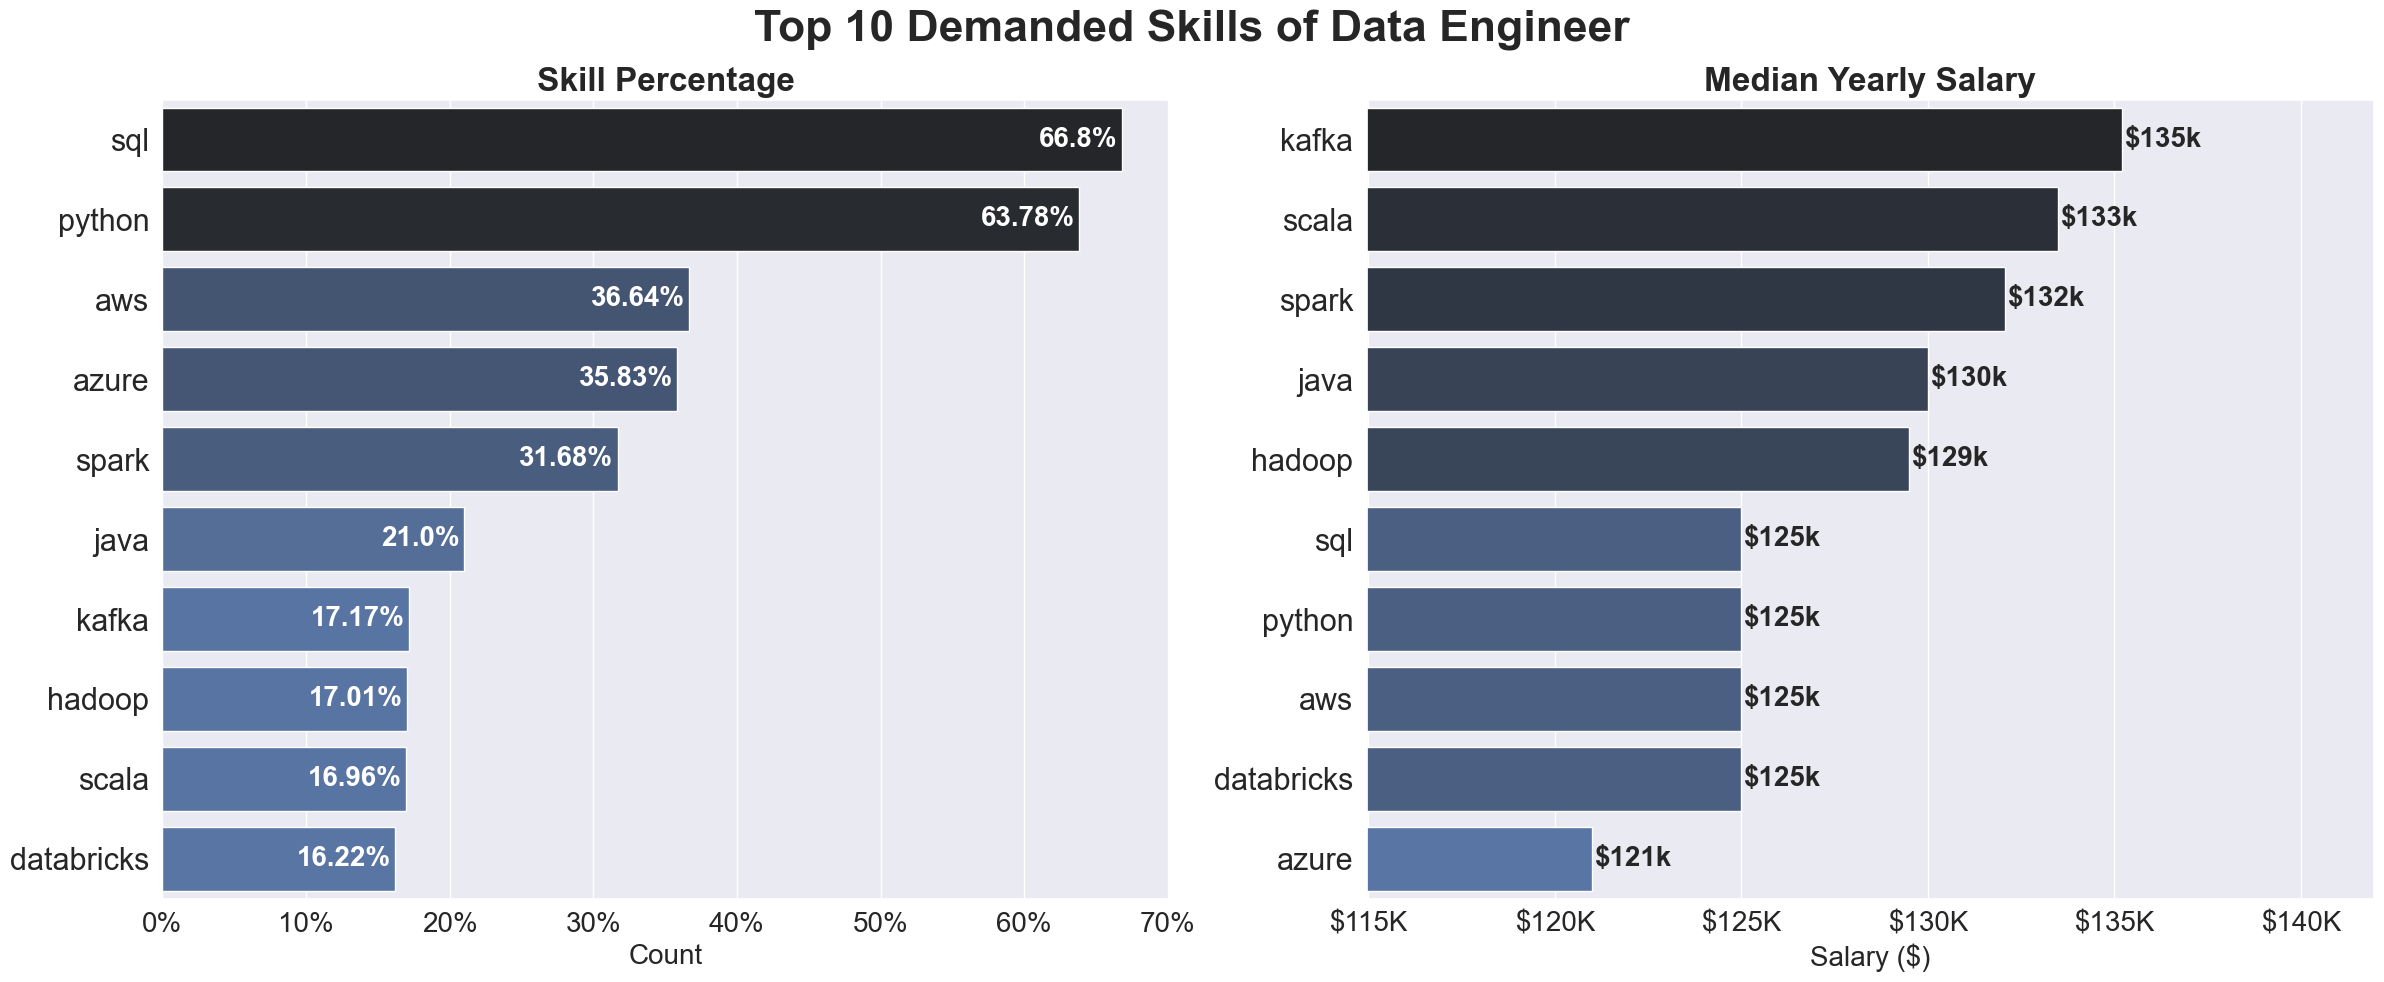

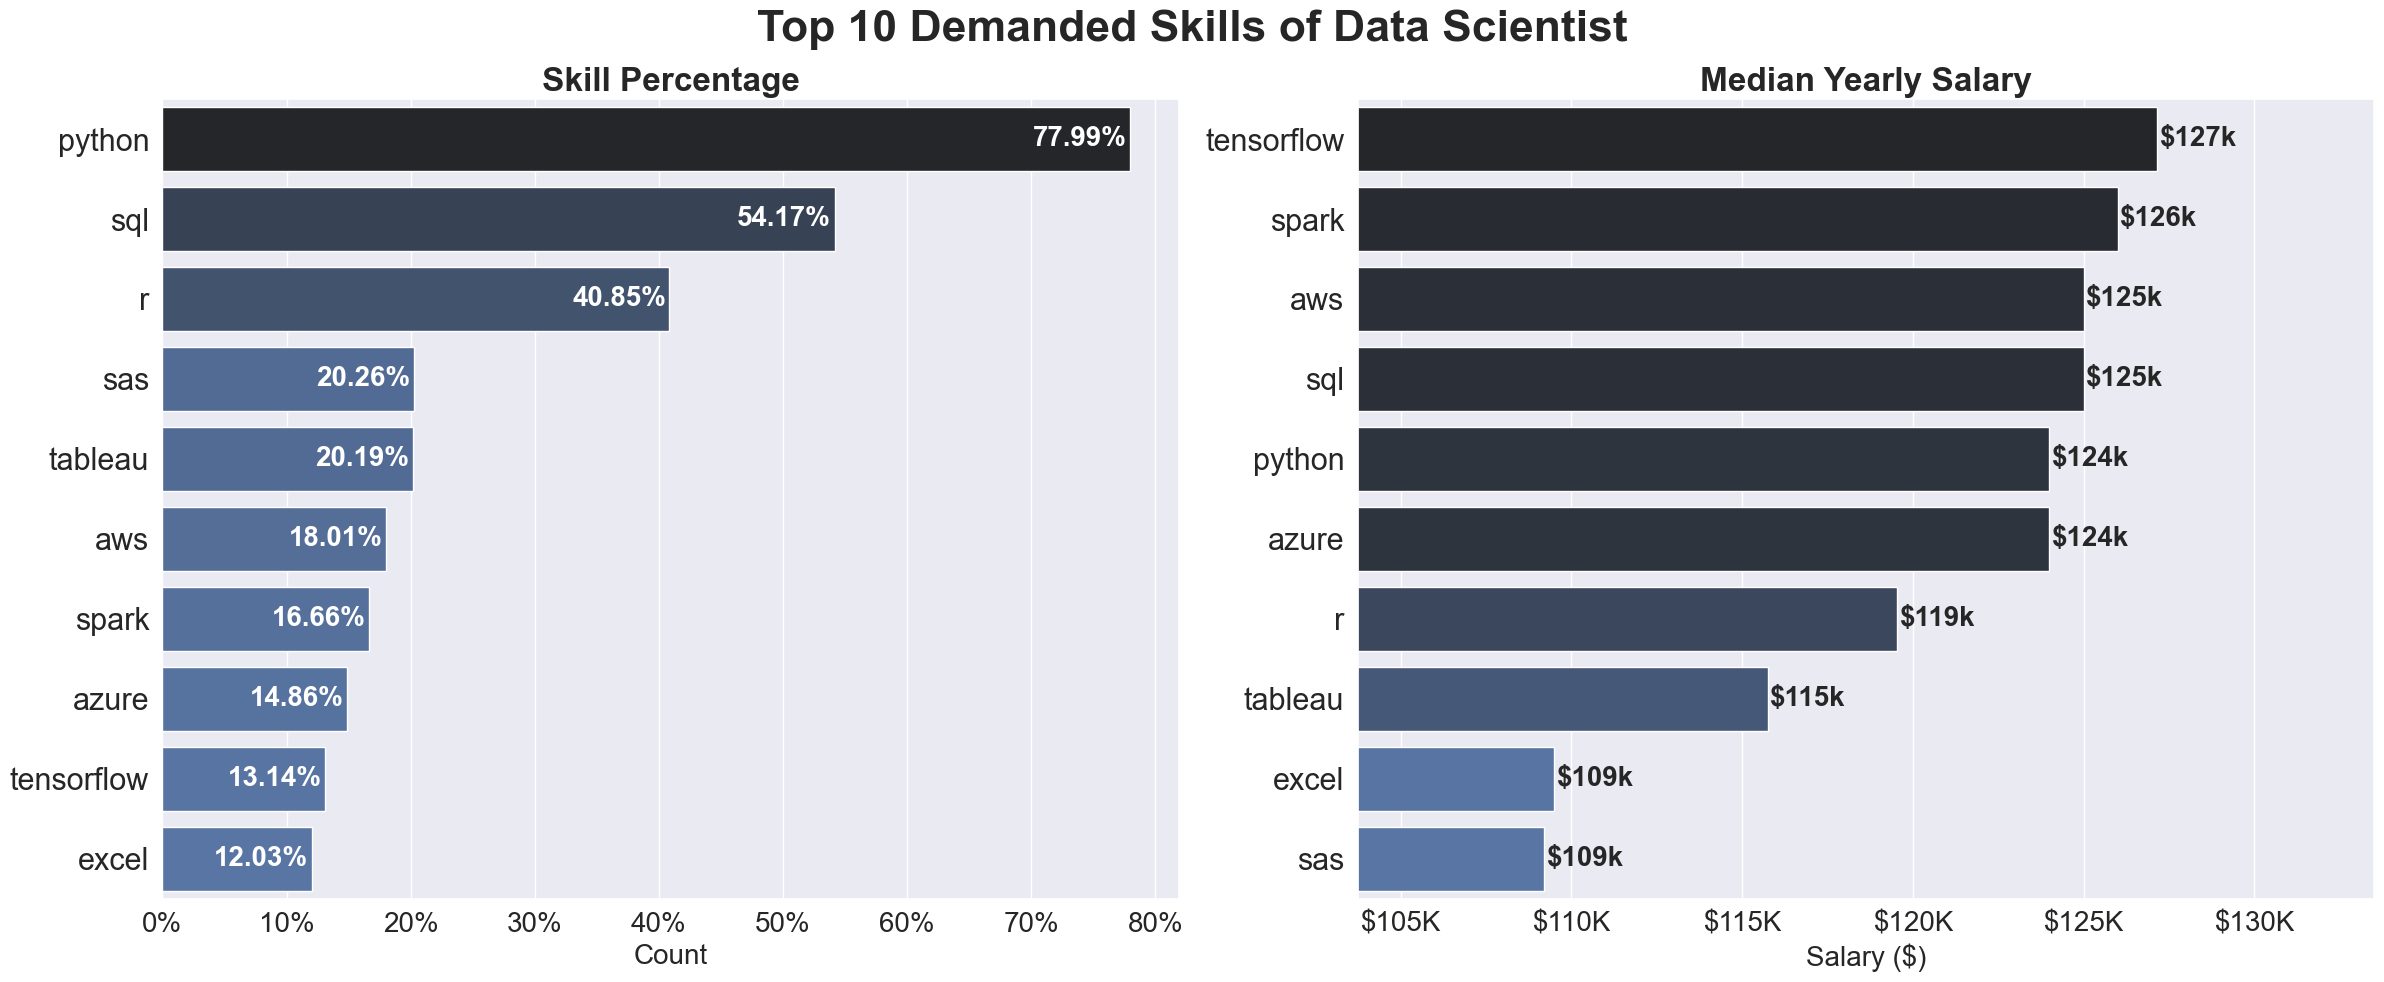

In [11]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
ntop_skills = 10                # --> No. of Top Skills

for job_title in job_titles:

    fig, ax = plt.subplots(1, 2, figsize=(24,10))
    sns.set_theme()

    # Top demanded skills
    df_TopSkills = df_skills[df_skills['job_title_short'] == job_title] \
                            .nlargest(ntop_skills, 'skill_count') \
                            .loc[:, 'job_skills':'yearly_salary_avg'] \
                            .reset_index(drop=True)

    df_TopSkills['skill_percentage'] = 100 * df_TopSkills['skill_count'] / len(df[df['job_title_short'] == job_title])

    # ------------------------------------------ Top demanded skills bar chart -----------------------------------------------
    
    sns.barplot(data=df_TopSkills, x='skill_percentage', y='job_skills', 
                ax=ax[0], legend=False, hue='skill_count', palette='dark:b_r')
    
    ax[0].set_title('Skill Percentage', fontsize=24, fontweight='bold')
    ax[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: format(f'{int(x)}%')))
    ax[0].set_ylabel('')
    ax[0].set_xlabel('Count', fontsize=20)
    ax[0].tick_params(axis='y', labelsize=22)
    ax[0].tick_params(axis='x', labelsize=20)

    
    for p in ax[0].patches: #Add values INSIDE horizontal bars
        ax[0].annotate(
        format(f'{round(p.get_width(), 2)}%'),  # show as integer with commas
        (p.get_x() + p.get_width() - 0.3,       # push text near the end of bar
         p.get_y() + p.get_height() / 2.), 
        ha='right', va='center',
        color='white', fontsize=20, fontweight='bold'
    )

    # ------------------------------------------ Top demanded skills salaries bar chart ------------------------------------------

    sns.barplot(data=df_TopSkills.sort_values('yearly_salary_avg', ascending=False), x='yearly_salary_avg', y='job_skills', 
                ax=ax[1], legend=False, hue='yearly_salary_avg', palette='dark:b_r')
    
    ax[1].set_title('Median Yearly Salary', fontsize=24, fontweight='bold')
    ax[1].set_ylabel('')
    ax[1].set_xlim(ax[1].patches[0].get_width() - ax[1].patches[0].get_width()*0.05)
    ax[1].set_xlabel('Salary ($)', fontsize=20)
    ax[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    ax[1].tick_params(axis='y', labelsize=22)
    ax[1].tick_params(axis='x', labelsize=20)


    for p in ax[1].patches: #Add values BESIDE horizontal bars
        ax[1].annotate(
        format(f'${int(p.get_width()/1000)}k'),  # show as integer with commas
        (p.get_x() + p.get_width() + 50,         # push text near the end of bar
         p.get_y() + p.get_height() / 2.), 
        ha='left', va='center',
        fontsize=20, fontweight='bold'
    )

    # ------------------------------------------ Figure title ------------------------------------------
    fig.suptitle(f'Top {ntop_skills} Demanded Skills of {job_title}', fontsize=32, fontweight='bold')
    fig.tight_layout()